In [1]:
pip install tensorflow numpy matplotlib

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 55s 57ms/step - accuracy: 0.8860 - loss: 0.3932
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 56ms/step - accuracy: 0.9830 - loss: 0.0545
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 78s 52ms/step - accuracy: 0.9885 - loss: 0.0357
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 53s 56ms/step - accuracy: 0.9907 - loss: 0.0274
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 56ms/step - accuracy: 0.9938 - loss: 0.0210
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9879 - loss: 0.0354

Test accuracy: 0.991599977016449
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


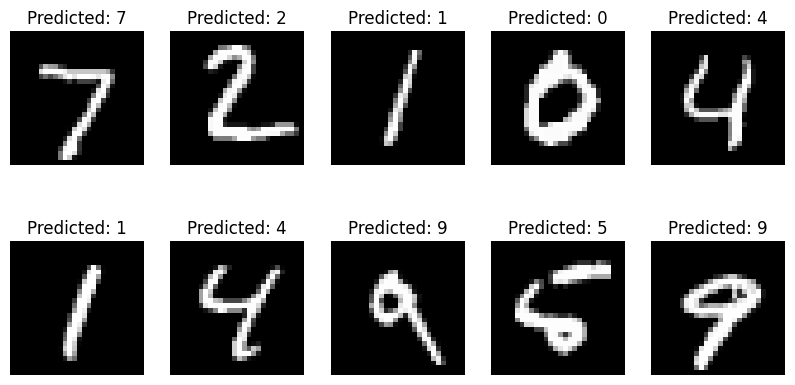

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# MNIST 데이터셋 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 전처리
x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32') / 255

# 레이블을 원-핫 인코딩
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# 모델 생성
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습
model.fit(x_train, y_train, epochs=5, batch_size=64)

# 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest accuracy: {test_acc}')

# 예측
predictions = model.predict(x_test)
predicted_classes = tf.argmax(predictions, axis=1)

# 결과 시각화
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {predicted_classes[i]}')
    plt.axis('off')
plt.show()
